In [1]:
%matplotlib inline

In [2]:
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat

import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern, Latin Modern Roman, Bitstream Vera Serif'
mpl.rcParams['text.usetex'] = True

import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
e_cfg = [1, 2, 4, 6, 8]
pi_cfg = [4, 6, 8]

In [4]:
e_data = np.array([
    [np.mean([ufloat(33.3, 2.6),   ufloat(28.06, 1.95)]),
     np.mean([ufloat(43.37, 6.07), ufloat(45.67, 6.96)]),
     np.mean([ufloat(48.63, 8.33), ufloat(53.31, 11.59)])],
    [np.mean([ufloat(35.8, 3.0),   ufloat(30.27, 2.44)]),
     np.mean([ufloat(33.5, 3.6),   ufloat(42.99, 5.97)]),
     np.mean([ufloat(40.85, 6.33), ufloat(55.89, 12.28)])],
    [np.mean([ufloat(22.97, 0.51), ufloat(22.43, 0.47)]),
     np.mean([ufloat(26.98, 0.73), ufloat(25.38, 0.70)]),
     np.mean([ufloat(29.51, 1.2),  ufloat(29.25, 1.01)])],
    [np.mean([ufloat(23.66, 0.18), ufloat(21.73, 0.18)]),
     np.mean([ufloat(28.48, 0.28), ufloat(26.29, 0.25)]),
     np.mean([ufloat(28.63, 0.33), ufloat(31.06, 0.38)])],
    [np.mean([ufloat(17.02, 0.19), ufloat(19.58, 0.18)]),
     np.mean([ufloat(16.07, 0.17), ufloat(21.87, 0.25)]),
     np.mean([ufloat(26.23, 0.35), ufloat(26.79, 0.35)])]
])

pi_data = np.array([
    [np.mean([ufloat(17.56, 1.13), ufloat(18.55, 0.94)]),
     np.mean([ufloat(24.29, 1.54), ufloat(23.27, 1.85)]),
     np.mean([ufloat(22.66, 2.40), ufloat(24.51, 2.12)])],
    [np.mean([ufloat(18.06, 0.60), ufloat(14.82, 0.59)]),
     np.mean([ufloat(17.83, 0.73), ufloat(14.93, 0.71)]),
     np.mean([ufloat(20.08, 0.95), ufloat(19.46, 0.77)])],
    [np.mean([ufloat(10.22, 0.30), ufloat(11.28, 0.35)]),
     np.mean([ufloat(11.43, 0.32), ufloat(14.57, 0.56)]),
     np.mean([ufloat(14.5, 0.5),   ufloat(16.64, 0.72)])]
])

e_data = np.mean(e_data.T, axis=0)
pi_data = np.mean(pi_data.T, axis=0)

print 'e_data', unp.nominal_values(e_data)
print 'pi_data', unp.nominal_values(pi_data)

e_data [42.05666667 39.88333333 26.08666667 26.64166667 21.26      ]
pi_data [21.80666667 17.53       13.10666667]


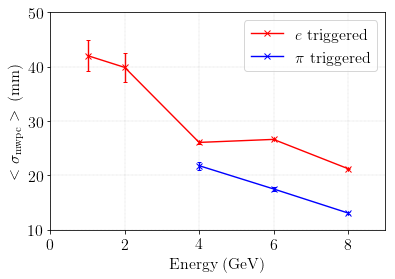

In [5]:
fontsize = 16

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ax.set_xlim(0, 9)
ax.set_ylim(10, 50)

for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=1, linewidth=0.3)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=1, linewidth=0.3)

ax.set_xlabel(r'Energy (GeV)', fontsize=fontsize)
ax.set_ylabel(r'$<\sigma_{\rm mwpc}>\:({\rm mm})$', fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

x = e_cfg
y = e_data
ax.plot(x, unp.nominal_values(y), marker='x', color='red',
        linewidth=1.4, label=r'$e$ triggered')
ax.errorbar(
    x, unp.nominal_values(y), color='red', xerr=0, yerr=unp.std_devs(y),
    capsize=1.6, alpha=1, linestyle='None', markersize=2, linewidth=1.4
)

x = pi_cfg
y = pi_data
ax.plot(x, unp.nominal_values(y), marker='x', color='blue',
        linewidth=1.4, label=r'$\pi$ triggered')
ax.errorbar(
    x, unp.nominal_values(y), color='blue', xerr=0, yerr=unp.std_devs(y),
    capsize=1.6, alpha=1, linestyle='None', markersize=2, linewidth=1.4
)

ax.legend(loc='upper right', prop={'size': fontsize})

fig.savefig('./images/mwpc.pdf', bbox_inches='tight', dpi=150)